# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**:
<br/>
Felipe Ottoni Pereira
<br/>
Letícia Almeida Paulino de Alencar Ferreira
<br/>

**RA**:
<br/>
804317 (Felipe)
<br/>
800408 (Letícia)


---
### Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

In [9]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# imports
import pandas as pd
import numpy as np

In [3]:
# lendo users_info.txt em um dataframe
from scripts import read_users_info
df_users_info = read_users_info()

# junção para adquirir as classes
df_train = pd.read_csv("dataset/train.csv")
df_users_info = df_users_info.merge(df_train, on="Id", how="inner")

In [4]:
# análise básica do dataframe users_info
display(df_users_info.head(n=10))
print("\nInfo:")
df_users_info.info()
print("\nDescribe (métricas):")
print(df_users_info.describe())
print("\nShape:")
print(df_users_info.shape)
print("\nQuantidade Valores Nulos:")
print(df_users_info.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_users_info.duplicated().sum())

,Id,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise,Label
0,U_27250,m,20.0,185.0,95.0,No,V1,Yes****,Yes,Yes,AEROBIC
1,U_82422,f,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,STRESS
2,U_35900,m,21.0,175.0,65.0,Yes,V1,Yes,Yes,Yes,ANAEROBIC
3,U_30402,m,21.0,174.0,70.0,Yes,V1,Yes,Yes,Yes,ANAEROBIC
4,U_94914,m,21.0,172.0,70.0,Yes,V1,Yes,Yes,Yes***,STRESS
5,U_81466,f,29.0,154.0,56.0,No,V2,Yes,Yes,Yes,ANAEROBIC
6,U_92226,m,NaN,NaN,NaN,NaN,V2,Yes,NaN,NaN,STRESS
7,U_20551,f,25.0,152.0,61.0,No,V2,Yes,Yes,Yes,AEROBIC
8,U_94349,m,21.0,192.0,84.0,Yes,V1,Yes,Yes,Yes****,AEROBIC
9,U_38235,m,21.0,173.0,72.0,Yes,V1,Yes,Yes,Yes,STRESS



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 75 non-null     object 
 1   Gender                             75 non-null     object 
 2   Age                                71 non-null     float64
 3   Height (cm)                        71 non-null     float64
 4   Weight (kg)                        71 non-null     float64
 5   Does physical activity regularly?  71 non-null     object 
 6   Protocol                           75 non-null     object 
 7   Stress Inducement                  75 non-null     object 
 8   Aerobic Exercise                   70 non-null     object 
 9   Anaerobic Exercise                 71 non-null     object 
 10  Label                              75 non-null     object 
dtypes: float64(3), object(8)
memory usage: 6.6+ KB

Descr

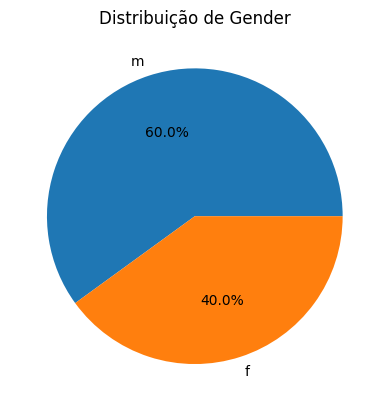

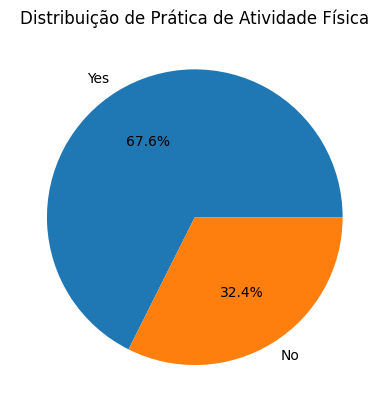

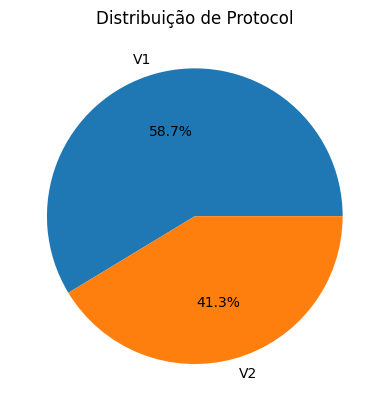

In [13]:
import matplotlib.pyplot as plt

# Gráfico de pizza do Gender
plt.figure()
df_users_info["Gender"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Distribuição de Gender")
plt.show()

# Gráfico de pizza do "Does physical activity regularly?"
plt.figure()
df_users_info["Does physical activity regularly?"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("") 
plt.title("Distribuição de Prática de Atividade Física")
plt.show()

# Gráfico de pizza do Protocol
plt.figure()
df_users_info["Protocol"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("") 
plt.title("Distribuição de Protocol")
plt.show()

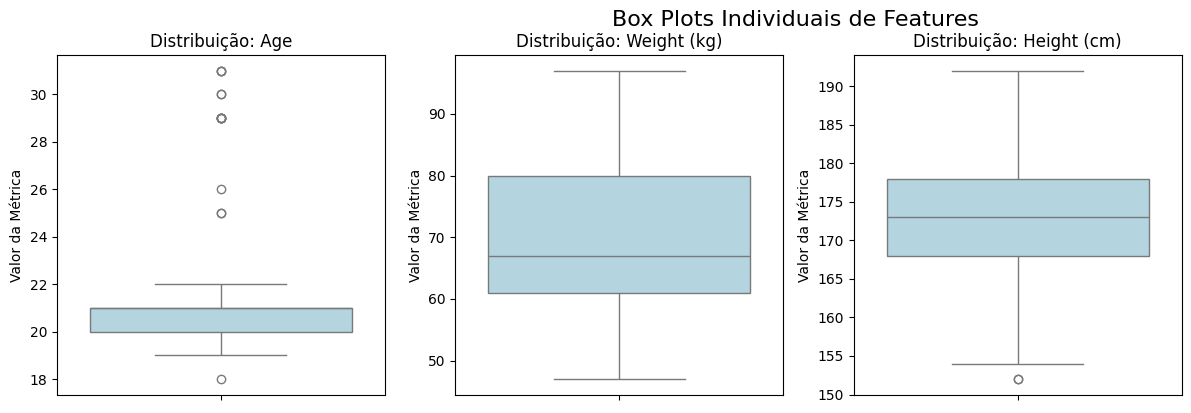

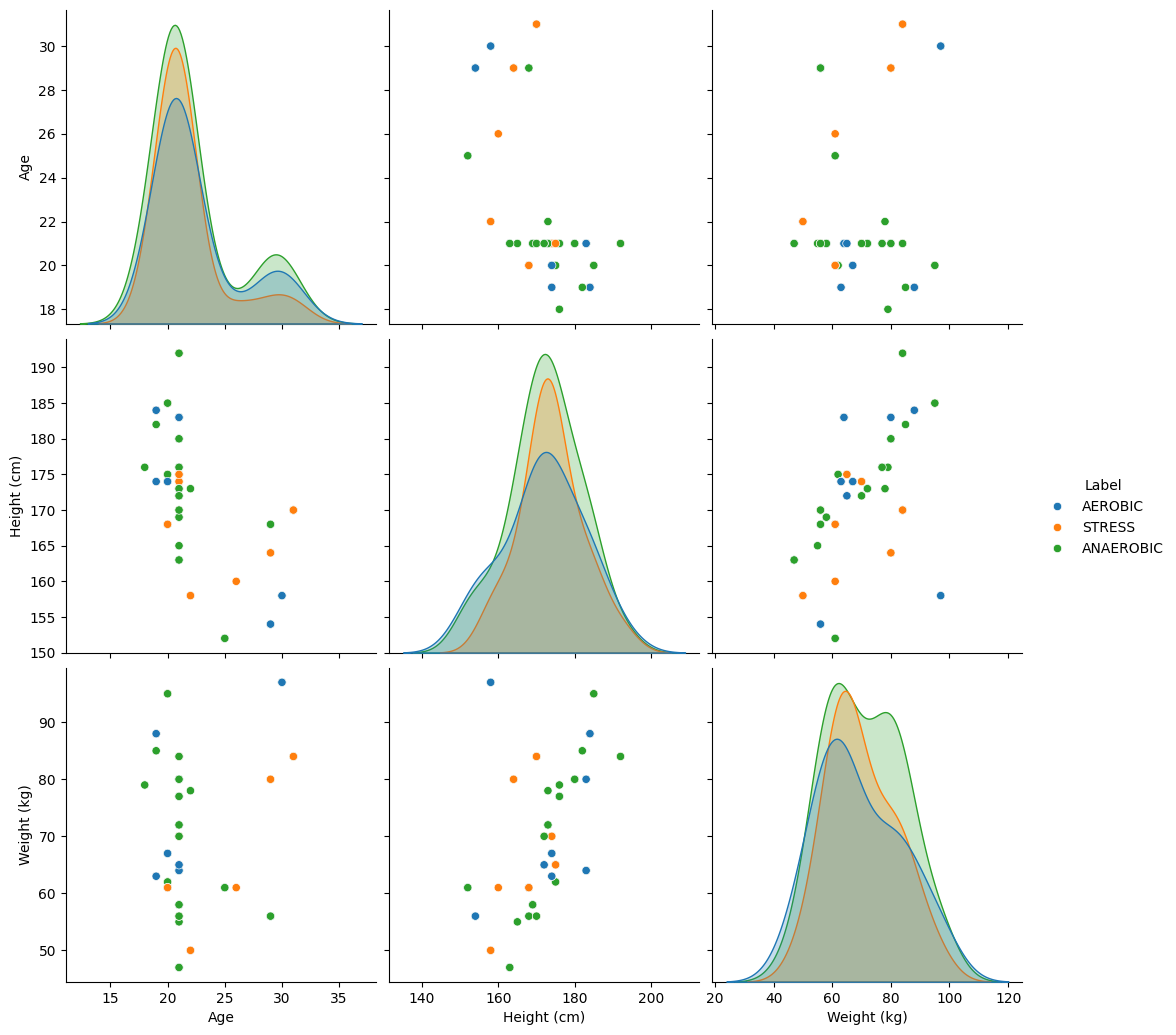

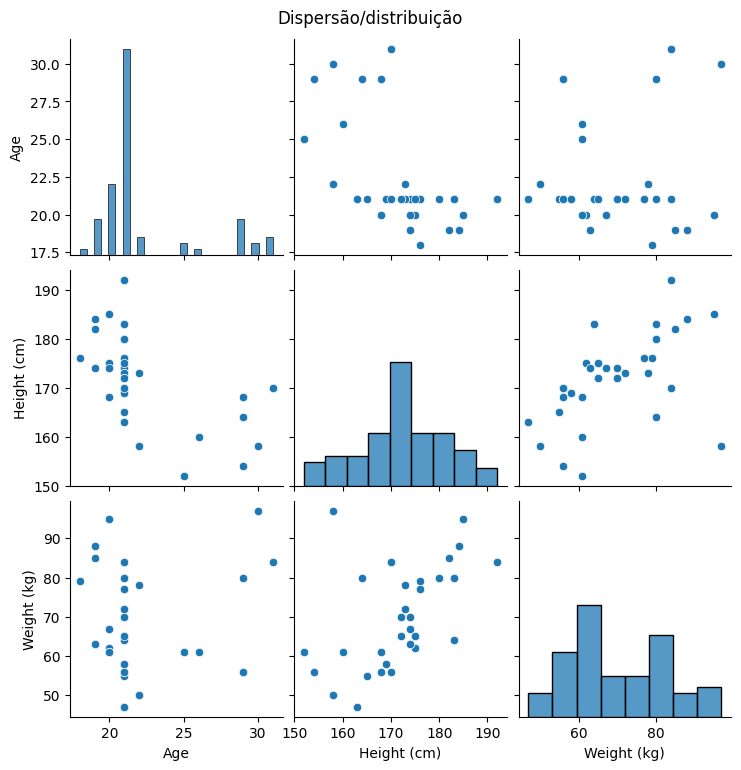

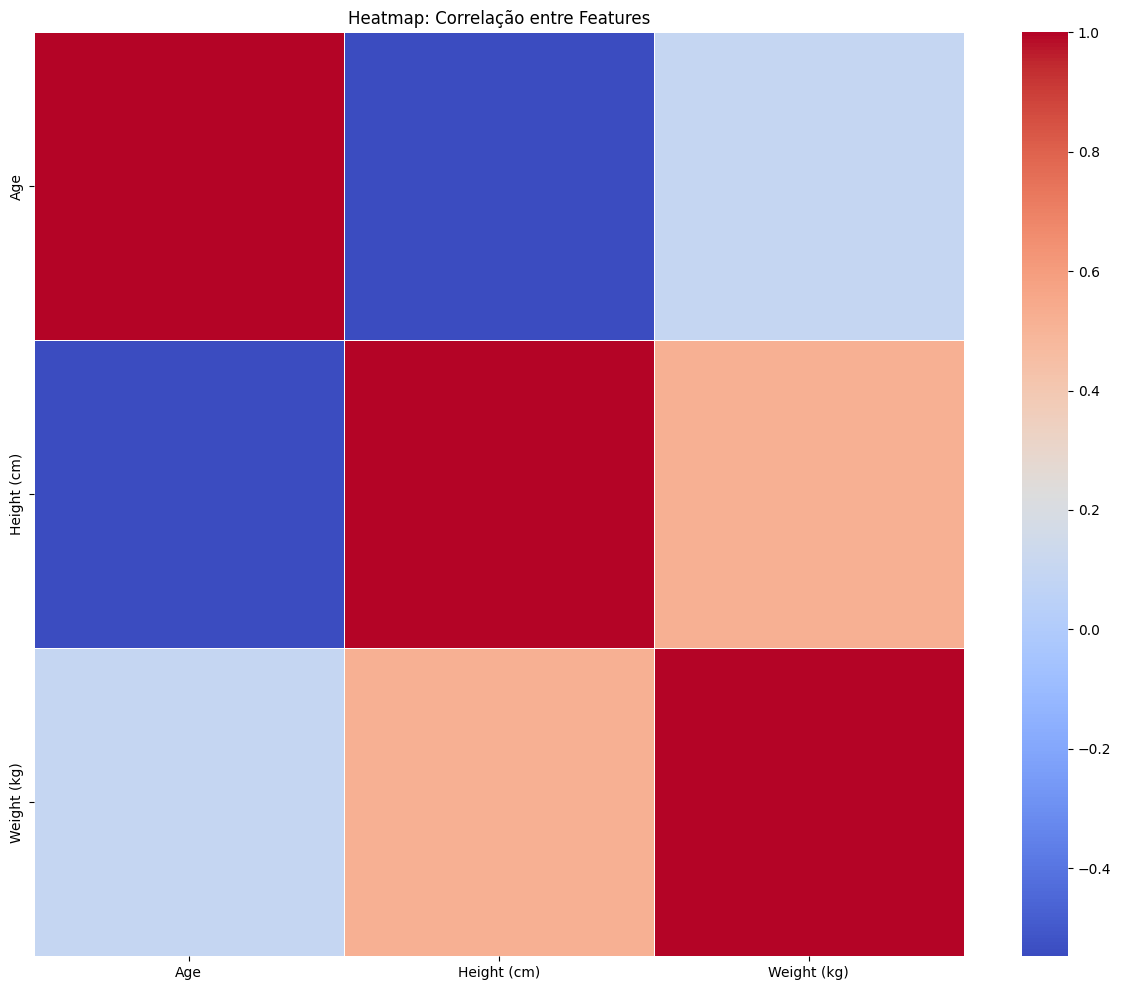

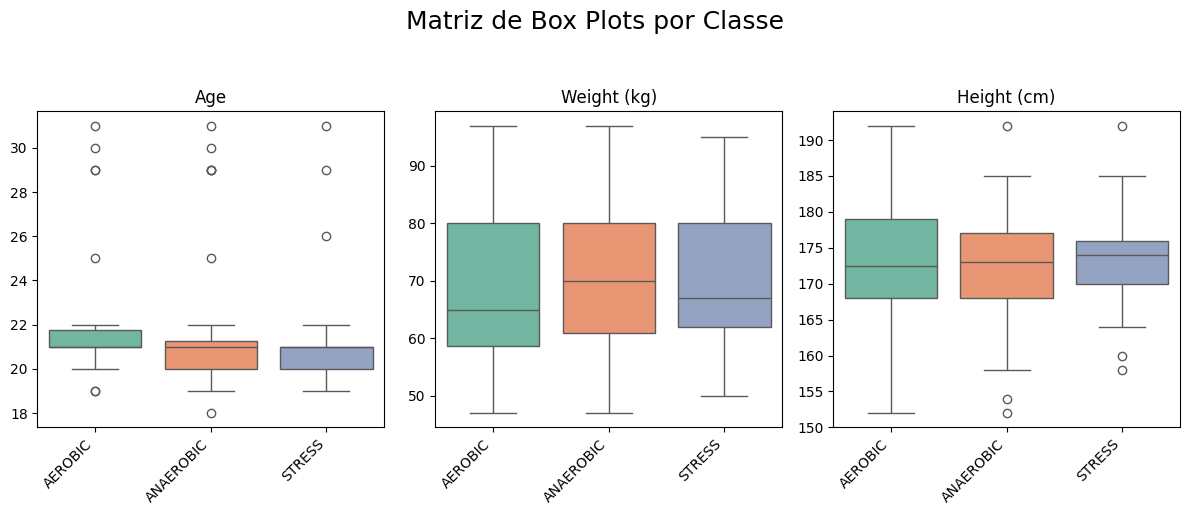

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import plot_boxplots_por_classe, plot_heatmap, plot_individual_boxplots

# BOXPLOTS: users_info
plot_individual_boxplots(df_users_info[['Age','Weight (kg)','Height (cm)','Label']])

# PAIRPLOT (v1): df_users_info 
sns.pairplot(df_users_info, hue='Label', height=3.5)
plt.show()

# PAIRPLOT (v2): df_users_info 
numeric_cols_users = df_users_info[['Age', 'Height (cm)', 'Weight (kg)']] 
sns.pairplot(numeric_cols_users)
plt.suptitle("Dispersão/distribuição", y=1.02)
plt.show()

# HEATMAP: df_users_info
plot_heatmap(df_users_info[["Age", "Height (cm)", "Weight (kg)"]])

# BOXPLOT POR CLASSE: df_users_info
plot_boxplots_por_classe(df_users_info[['Age','Weight (kg)','Height (cm)','Label']])

In [ ]:
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer
import numpy as np
from scripts import compute_fscore_ranking

# Calculo F-SCORE
ranking_users = compute_fscore_ranking(
    df_users_info,
    label_col="Label",
    id_cols=["Id"]
)

print(ranking_users)


                                  Feature   F_Score   P_Value
7                 Stress Inducement_Yes**  1.000000  0.372931
6                  Stress Inducement_Yes*  0.522234  0.595424
12              Anaerobic Exercise_Yes***  0.418708  0.659488
0                                     Age  0.412942  0.663257
5                             Protocol_V2  0.286413  0.751804
3                                Gender_m  0.235294  0.790944
1                             Height (cm)  0.232130  0.793434
4   Does physical activity regularly?_Yes  0.198327  0.820548
11               Anaerobic Exercise_Yes**  0.142965  0.867030
2                             Weight (kg)  0.125808  0.881977
10                Aerobic Exercise_Yes***  0.115919  0.890713
8               Stress Inducement_Yes****  0.014616  0.985493
9                  Aerobic Exercise_Yes**  0.014616  0.985493
13             Anaerobic Exercise_Yes****  0.014616  0.985493


In [6]:
import os
import traceback
from scripts import sumarize_sensor, process_BVP, process_EDA, process_HR, process_IBI, process_TEMP, process_ACC

base_path = "dataset/wearables"

df_sensors = pd.DataFrame()

for user_id in df_users_info["Id"]:
    
    user_folder = os.path.join(base_path, user_id)
    
    if not os.path.exists(user_folder):
        print(f"Aviso: pasta do usuário {user_id} não encontrada.")
        continue
    
    df_user_id = pd.DataFrame({'Id': [user_id]})
    
    # Sumarizar métricas de cada sensor
    try:
        df_acc = sumarize_sensor(user_folder, "ACC.csv", process_ACC, add_ts=True)
        df_bvp = sumarize_sensor(user_folder, "BVP.csv", process_BVP, add_ts=True)
        df_eda = sumarize_sensor(user_folder, "EDA.csv", process_EDA, add_ts=True)
        df_hr = sumarize_sensor(user_folder, "HR.csv", process_HR, add_ts=True)
        df_ibi = sumarize_sensor(user_folder, "IBI.csv", process_IBI, add_ts=False)
        df_temp = sumarize_sensor(user_folder, "TEMP.csv", process_TEMP, add_ts=True)
    except Exception as e:
        print(f"Erro de leitura no usuário {user_id}: {e}")
        # traceback.print_exc()
        continue
    # junção das métricas e user_id
    df_metrics = pd.concat([ df_user_id, df_acc, df_bvp, df_eda, df_hr, df_ibi, df_temp], axis=1)
    df_sensors = pd.concat([df_sensors, df_metrics], axis = 0, ignore_index=True)

# DataFrame final com métricas
display(df_sensors)


Erro de leitura no usuário U_87186: could not convert string to float: ' IBI'
Erro ao ler dataset/wearables\U_89740\IBI.csv: No columns to parse from file
Erro de leitura no usuário U_89740: 'NoneType' object has no attribute 'astype'


,Id,STD_X_ACC,STD_Y_ACC,STD_Z_ACC,Mean_Magnitude_ACC,coef_Magnitude_ACC,Mean_BVP,STD_BVP,Min_BVP,Max_BVP,...,Median_IBI,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP
0,U_27250,6.101109,3.408618,4.319164,63.862681,0.000209,0.003456,48.570026,-549.96,228.25,...,0.468750,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112
1,U_82422,20.176866,19.542436,26.521348,63.608307,-0.000118,0.000648,54.396609,-623.08,671.47,...,0.828125,0.765625,0.890625,0.781250,0.092662,32.959323,1.74,32.37,34.11,-0.000066
2,U_35900,5.895799,5.406901,9.905712,64.856920,-0.000315,0.002445,44.829017,-551.33,851.78,...,0.390625,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230
3,U_30402,15.377926,5.677559,6.436747,64.891841,0.000353,-0.001947,50.522170,-810.83,761.06,...,0.578125,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472
4,U_94914,9.358314,16.985190,9.382421,63.606232,-0.000484,-0.003224,50.838881,-723.56,515.59,...,0.656250,0.609375,0.703125,0.437500,0.034005,33.698857,0.69,33.15,33.84,-0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,U_60647,5.628006,3.954855,6.363700,64.730718,-0.000021,-0.001660,67.349098,-996.01,663.55,...,0.437500,0.390625,0.453125,0.765625,0.113968,200.873763,200.94,33.23,234.17,0.091568
69,U_92575,19.013523,32.370713,31.539569,134.903297,0.013455,-0.023380,57.532866,-549.81,600.60,...,0.468750,0.406250,0.671875,0.750000,0.103075,32.023653,4.04,29.53,33.57,-0.002227
70,U_91344,15.757978,3.398167,10.146569,64.448385,0.000016,0.026798,68.500534,-589.31,409.61,...,0.515625,0.484375,0.531250,0.515625,0.053500,31.958570,0.99,31.67,32.66,0.000431
71,U_50892,24.501247,28.637030,16.822815,63.613543,0.000258,-0.015167,65.329052,-729.11,789.53,...,0.437500,0.406250,0.468750,1.015625,0.077832,29.755823,1.44,29.13,30.57,0.000444


In [7]:
# análise básica do dataframe df_sensors
df_sensors = df_sensors.merge(df_train, on="Id", how="inner")
display(df_sensors.head(n=10))
print("\nInfo:")
df_sensors.info()
print("\nDescribe (métricas):")
print(df_sensors.describe())
print("\nShape:")
print(df_sensors.shape)
print("\nQuantidade Valores Nulos:")
print(df_sensors.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_sensors.duplicated().sum())

,Id,STD_X_ACC,STD_Y_ACC,STD_Z_ACC,Mean_Magnitude_ACC,coef_Magnitude_ACC,Mean_BVP,STD_BVP,Min_BVP,Max_BVP,...,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP,Label
0,U_27250,6.101109,3.408618,4.319164,63.862681,0.000209,0.003456,48.570026,-549.96,228.25,...,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112,AEROBIC
1,U_82422,20.176866,19.542436,26.521348,63.608307,-0.000118,0.000648,54.396609,-623.08,671.47,...,0.765625,0.890625,0.781250,0.092662,32.959323,1.74,32.37,34.11,-0.000066,STRESS
2,U_35900,5.895799,5.406901,9.905712,64.856920,-0.000315,0.002445,44.829017,-551.33,851.78,...,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230,ANAEROBIC
3,U_30402,15.377926,5.677559,6.436747,64.891841,0.000353,-0.001947,50.522170,-810.83,761.06,...,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472,ANAEROBIC
4,U_94914,9.358314,16.985190,9.382421,63.606232,-0.000484,-0.003224,50.838881,-723.56,515.59,...,0.609375,0.703125,0.437500,0.034005,33.698857,0.69,33.15,33.84,-0.000032,STRESS
5,U_81466,26.279668,26.456046,22.618042,65.226845,-0.000215,0.002792,107.614092,-1035.34,1199.27,...,0.484375,0.671875,0.812500,0.067572,32.211160,3.46,30.95,34.41,-0.000888,ANAEROBIC
6,U_92226,13.811250,13.923974,11.528383,64.348994,-0.000010,-0.005590,49.121826,-910.81,638.64,...,0.734375,0.828125,0.718750,0.045369,30.274936,3.96,27.55,31.51,0.000981,STRESS
7,U_20551,23.326157,32.093267,25.353853,64.975740,0.000562,0.004022,61.839733,-593.00,544.71,...,0.359375,0.531250,0.984375,0.073149,31.897457,5.64,28.17,33.81,0.000440,AEROBIC
8,U_94349,6.214971,5.246240,7.168994,63.521304,0.000296,-0.003683,46.853614,-907.68,511.43,...,0.546875,0.609375,0.531250,0.048204,32.467922,6.02,29.87,35.89,-0.003386,AEROBIC
9,U_38235,16.119736,17.128394,25.301352,63.862339,-0.000145,0.011029,75.442969,-1077.42,827.81,...,0.777344,0.878906,0.500000,0.046391,33.580589,2.38,31.53,33.91,0.000339,STRESS



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  73 non-null     object 
 1   STD_X_ACC           73 non-null     float64
 2   STD_Y_ACC           73 non-null     float64
 3   STD_Z_ACC           73 non-null     float64
 4   Mean_Magnitude_ACC  73 non-null     float64
 5   coef_Magnitude_ACC  73 non-null     float64
 6   Mean_BVP            73 non-null     float64
 7   STD_BVP             73 non-null     float64
 8   Min_BVP             73 non-null     float64
 9   Max_BVP             73 non-null     float64
 10  Range_BVP           73 non-null     float64
 11  coef_BVP            73 non-null     float64
 12  Mean_EDA            73 non-null     float64
 13  STD_EDA             73 non-null     float64
 14  Min_EDA             73 non-null     float64
 15  Max_EDA             73 non-null     float64
 16  Ran

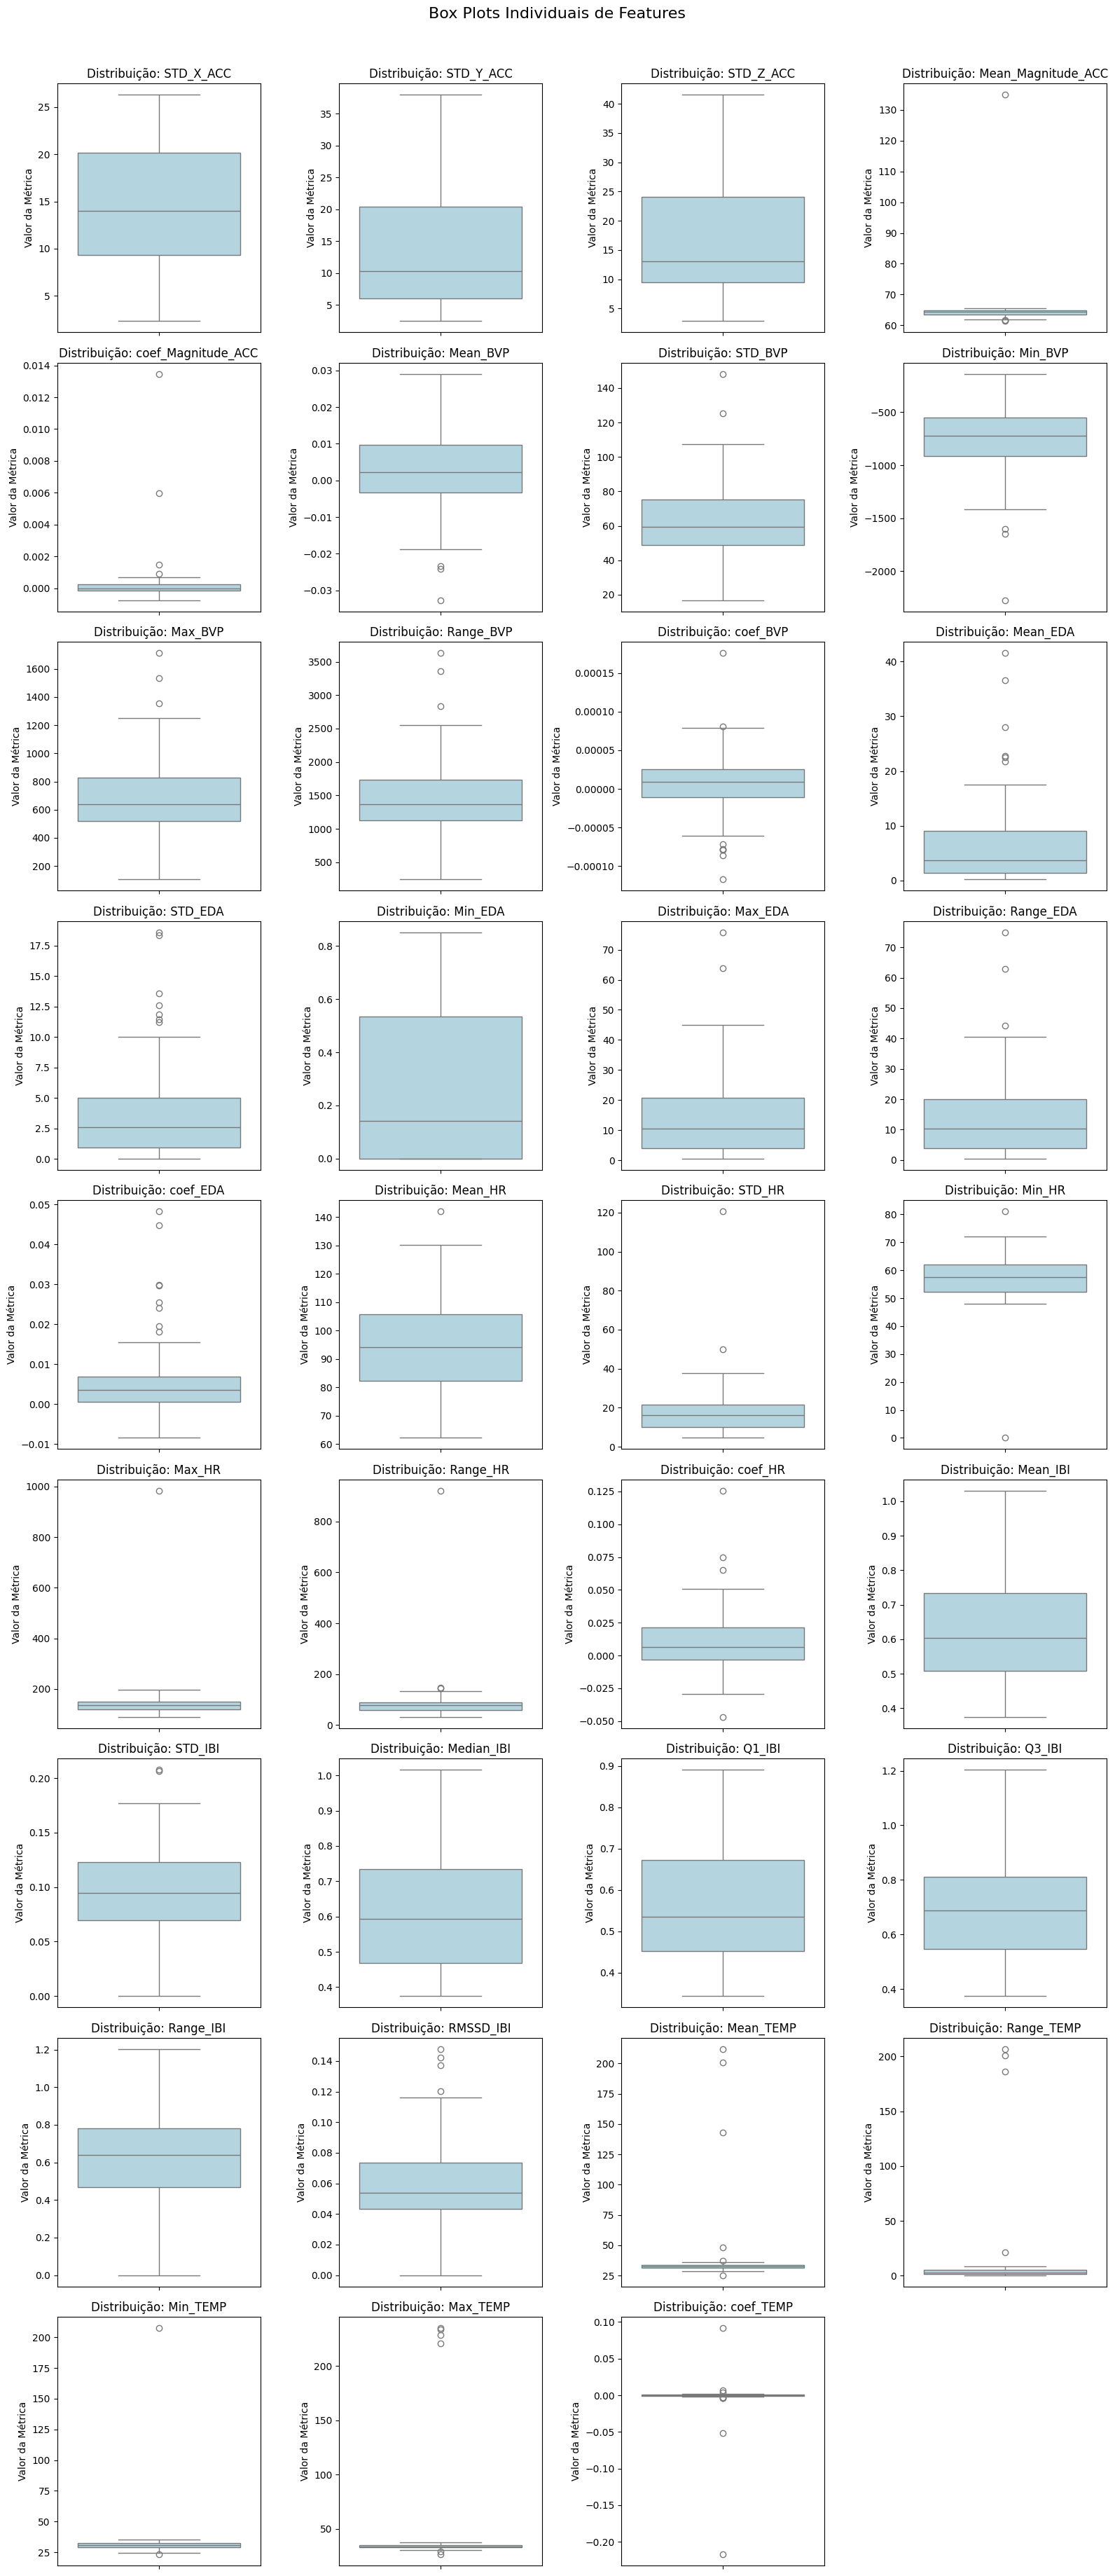

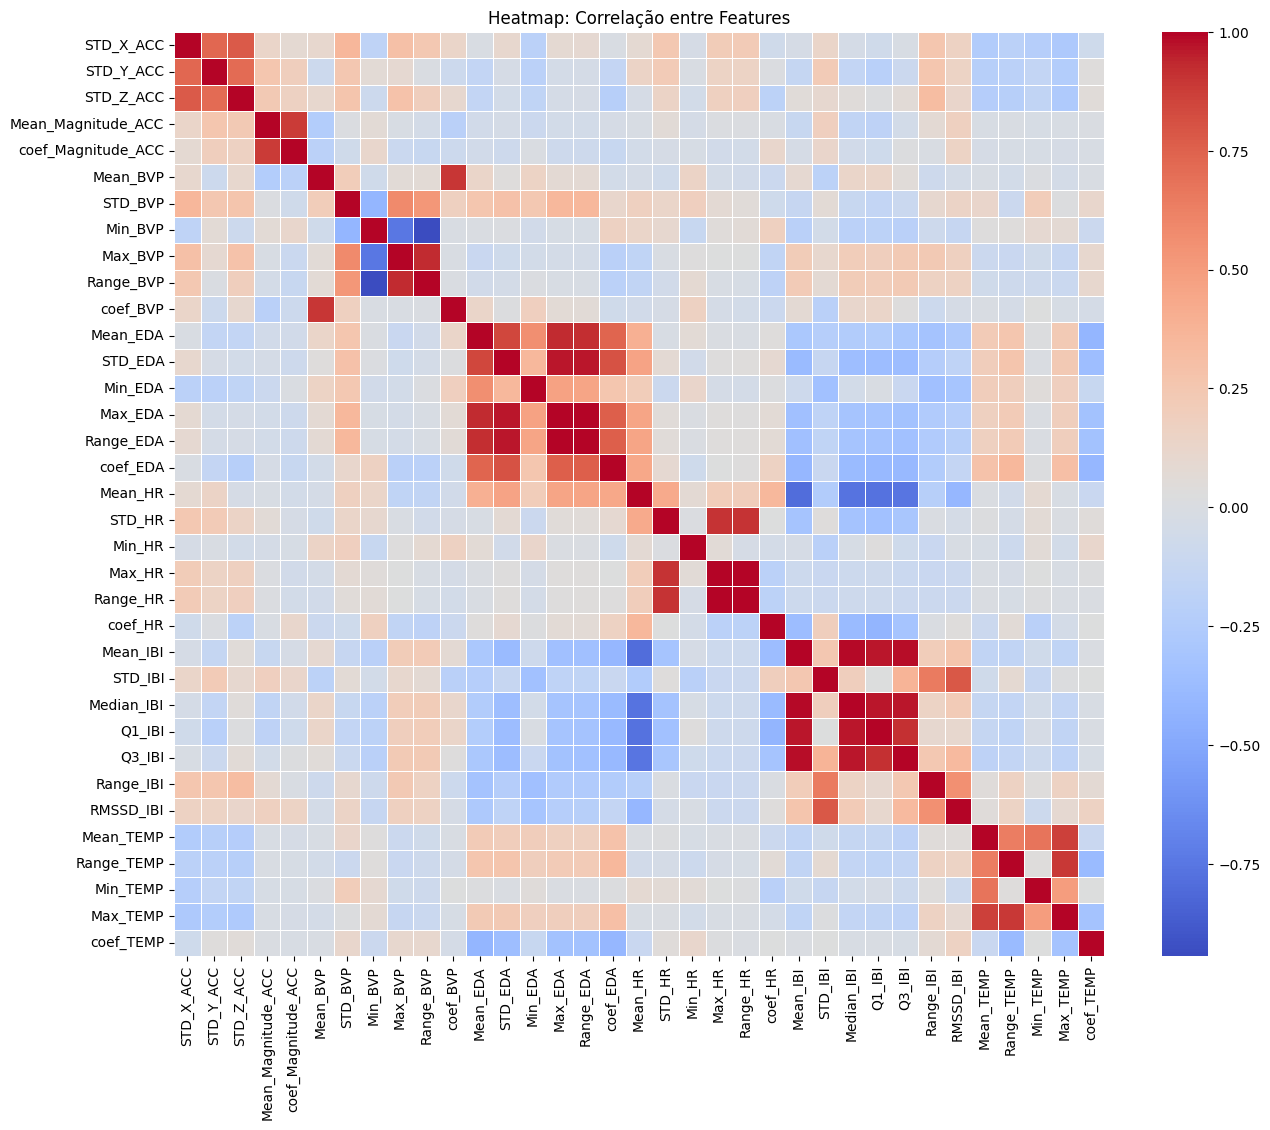

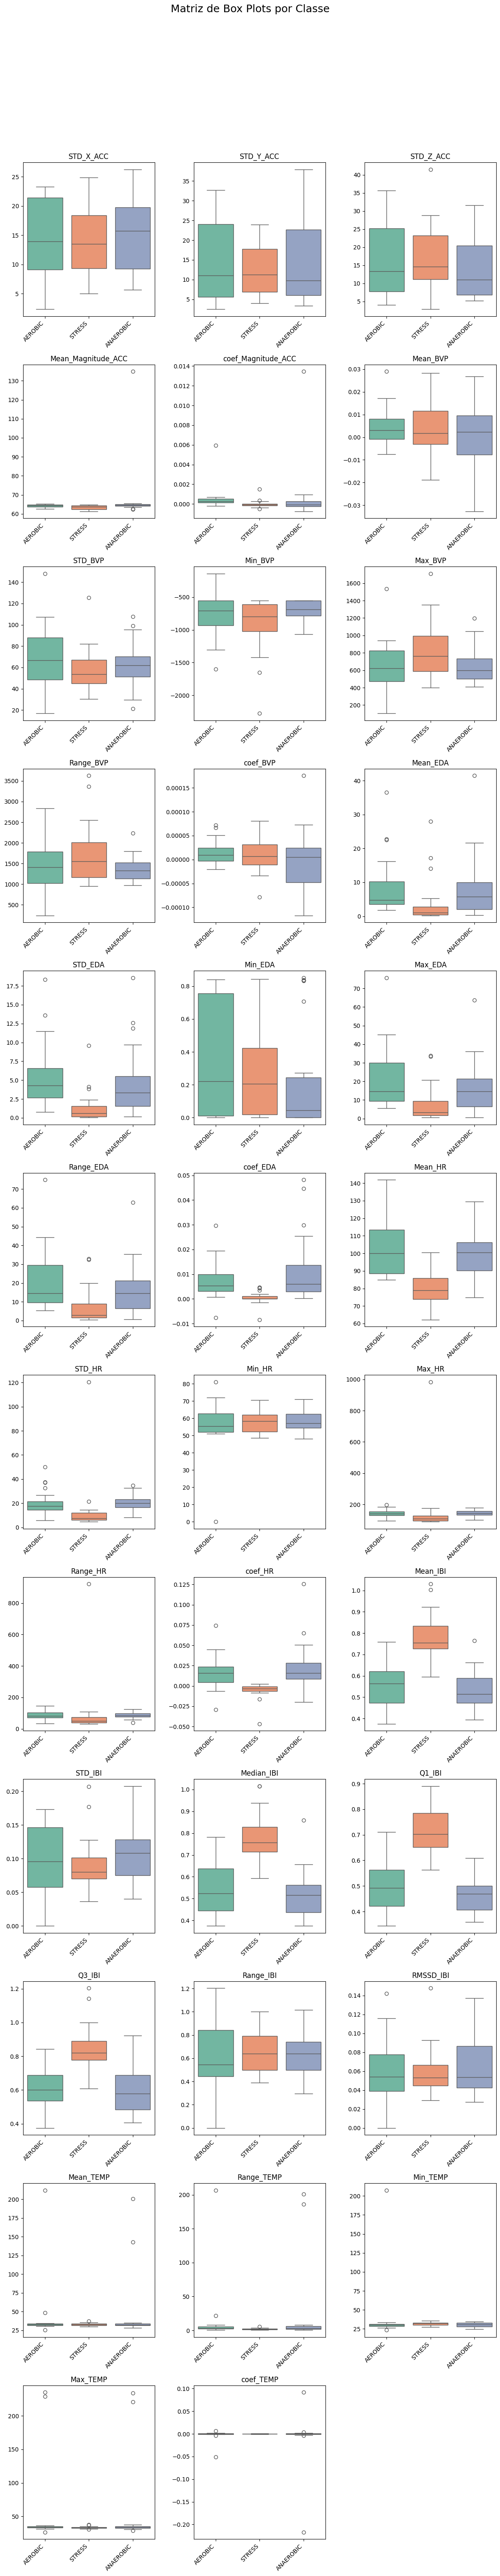

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scripts import plot_boxplots_por_classe, plot_individual_boxplots, plot_heatmap

# 1. CONJUNTO DE BOXPLOTS INDIVIDUAIS: df_sensors
plot_individual_boxplots(df_sensors)

# 2. HEATMAP: df_sensors
plot_heatmap(df_sensors)

# BOXPLOT POR CLASSE: df_sensors
plot_boxplots_por_classe(df_sensors)


In [ ]:
from scripts import compute_fscore_ranking

# Calculo F-SCORE

ranking_sensors = compute_fscore_ranking(
    df_sensors, 
    label_col="Label",
    id_cols=["Id"]
)

print(ranking_sensors.head(10))


       Feature    F_Score       P_Value
26      Q1_IBI  61.267002  4.175139e-16
23    Mean_IBI  44.069682  4.092907e-13
25  Median_IBI  40.685433  1.892131e-12
27      Q3_IBI  28.798120  7.483518e-10
17     Mean_HR  20.200991  1.186427e-07
22     coef_HR  10.910568  7.506513e-05
16    coef_EDA   8.748247  4.062175e-04
12     STD_EDA   8.021610  7.300429e-04
15   Range_EDA   6.314506  3.011562e-03
14     Max_EDA   6.188135  3.352409e-03


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

In [6]:
from scripts import clean_users_info

# Limpa o DataFrame de informações dos usuários removendo casos inválidos/nulos por cálculos de média
df_users_info_clean = clean_users_info(df_users_info)

# visualização
df_users_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 81 non-null     object 
 1   Gender                             81 non-null     object 
 2   Age                                81 non-null     float64
 3   Height (cm)                        81 non-null     float64
 4   Weight (kg)                        81 non-null     float64
 5   Does physical activity regularly?  81 non-null     object 
 6   Protocol                           81 non-null     object 
 7   Stress Inducement                  81 non-null     object 
 8   Aerobic Exercise                   81 non-null     object 
 9   Anaerobic Exercise                 81 non-null     object 
dtypes: float64(3), object(7)
memory usage: 7.0+ KB


In [8]:
# Fazer merge com df_users_info
df_inicial = df_users_info_clean.merge(df_sensors, on="Id", how="left")
display(df_inicial.head(n=10))
print("\nInfo:")
df_inicial.info()
print("\nDescribe (métricas):")
print(df_inicial.describe())
print("\nShape:")
print(df_inicial.shape)
print("\nQuantidade Valores Nulos:")
print(df_inicial.isnull().sum())
print("\nLinhas Duplicadas:")
print(df_inicial.duplicated().sum())

,Id,Gender,Age,Height (cm),Weight (kg),Does physical activity regularly?,Protocol,Stress Inducement,Aerobic Exercise,Anaerobic Exercise,...,Median_IBI,Q1_IBI,Q3_IBI,Range_IBI,RMSSD_IBI,Mean_TEMP,Range_TEMP,Min_TEMP,Max_TEMP,coef_TEMP
0,U_21920,m,22.0,173.0,78.0,Yes,V1,Yes,Yes,Yes,...,0.875000,0.812500,0.921875,0.531250,0.052961,34.273373,7.30,27.93,35.23,0.001530
1,U_27250,m,20.0,185.0,95.0,No,V1,Yes****,Yes,Yes,...,0.468750,0.421875,0.515625,0.437500,0.036130,32.777873,2.34,31.71,34.05,0.001112
2,U_35900,m,21.0,175.0,65.0,Yes,V1,Yes,Yes,Yes,...,0.390625,0.359375,0.421875,0.468750,0.048288,32.440881,7.78,27.69,35.47,-0.001230
3,U_30402,m,21.0,174.0,70.0,Yes,V1,Yes,Yes,Yes,...,0.578125,0.484375,0.765625,0.687500,0.115004,32.178336,7.88,26.23,34.11,0.000472
4,U_94914,m,21.0,172.0,70.0,Yes,V1,Yes,Yes,Yes***,...,0.656250,0.609375,0.703125,0.437500,0.034005,33.698857,0.69,33.15,33.84,-0.000032
5,U_81466,f,29.0,154.0,56.0,No,V2,Yes,Yes,Yes,...,0.546875,0.484375,0.671875,0.812500,0.067572,32.211160,3.46,30.95,34.41,-0.000888
6,U_20551,f,25.0,152.0,61.0,No,V2,Yes,Yes,Yes,...,0.390625,0.359375,0.531250,0.984375,0.073149,31.897457,5.64,28.17,33.81,0.000440
7,U_94349,m,21.0,192.0,84.0,Yes,V1,Yes,Yes,Yes****,...,0.578125,0.546875,0.609375,0.531250,0.048204,32.467922,6.02,29.87,35.89,-0.003386
8,U_38235,m,21.0,173.0,72.0,Yes,V1,Yes,Yes,Yes,...,0.828125,0.777344,0.878906,0.500000,0.046391,33.580589,2.38,31.53,33.91,0.000339
9,U_38395,m,19.0,174.0,63.0,Yes,V1,Yes,Yes,Yes,...,0.468750,0.437500,0.484375,0.812500,0.047809,33.838962,9.08,27.07,36.15,0.001749



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Id                                 81 non-null     object 
 1   Gender                             81 non-null     object 
 2   Age                                81 non-null     float64
 3   Height (cm)                        81 non-null     float64
 4   Weight (kg)                        81 non-null     float64
 5   Does physical activity regularly?  81 non-null     object 
 6   Protocol                           81 non-null     object 
 7   Stress Inducement                  81 non-null     object 
 8   Aerobic Exercise                   81 non-null     object 
 9   Anaerobic Exercise                 81 non-null     object 
 10  STD_X_ACC                          79 non-null     float64
 11  STD_Y_ACC                          79 non-null     fl

In [ ]:
# REMOVER COLUNAS
# Remoção Outliers
# SUSBTITUIR NULOS
# FORMATAR/MARKDOWNN
# VER SOBRE BALANCEAMENTO --> JUSTIFICATIVA

---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.